In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

## Initial Analysis

In [3]:
df = pd.read_csv('..\\Data\\healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.shape

(5110, 12)

In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.count()

id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
bmi                  4909
smoking_status       5110
stroke               5110
dtype: int64

In [8]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
df['bmi'].isnull().sum()

201

In [10]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [11]:
column_names = df.columns.values
for i in column_names:
    print(f"{i} = {df[i].unique()}\n")

id = [ 9046 51676 31112 ... 19723 37544 44679]

gender = ['Male' 'Female' 'Other']

age = [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e-

In [12]:
df.duplicated().sum()

0

In [13]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [14]:
age_converted = [int(i) for i in df['age']]
print(len(age_converted))
df['int_age'] = age_converted

5110


In [15]:
df[['age','int_age']]

,age,int_age
0,67.0,67
1,61.0,61
2,80.0,80
3,49.0,49
4,79.0,79
...,...,...
5105,80.0,80
5106,81.0,81
5107,35.0,35
5108,51.0,51


In [16]:
df = df.drop('age', axis=1)

In [17]:
df.head()

,id,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,int_age
0,9046,Male,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,67
1,51676,Female,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,61
2,31112,Male,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,80
3,60182,Female,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,49
4,1665,Female,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,79


In [18]:
print(df['int_age'].unique())

[67 61 80 49 79 81 74 69 59 78 54 50 64 75 60 57 71 52 82 65 58 42 48 72
 63 76 39 77 73 56 45 70 66 51 43 68 47 53 38 55  1 46 32 14  3  8 37 40
 35 20 44 25 27 23 17 13  4 16 22 30 29 11 21 18 33 24 34 36  0 41  5 26
 31  7 12 62  2  9 15 28 10 19  6]


<Axes: xlabel='stroke', ylabel='count'>

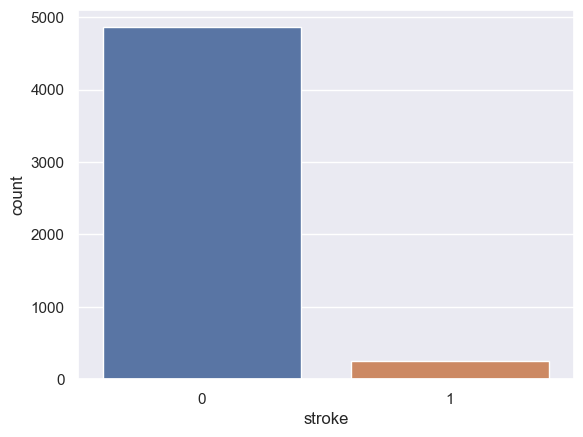

In [19]:
sns.countplot(data=df,x='stroke')

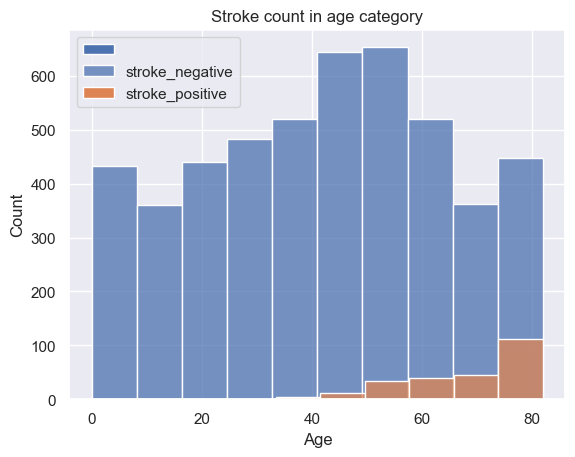

In [20]:
grouped = df.groupby('stroke')
fig, ax = plt.subplots()
for category, group_data in grouped:
    sns.histplot(group_data['int_age'], bins=10, label=category)
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Stroke count in age category')
ax.legend(["",'stroke_negative','stroke_positive'])
plt.show()

## Analysis on stroke positive

In [21]:
stroke_positive = df.loc[df['stroke'] == 1]
stroke_positive

,id,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,int_age
0,9046,Male,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,67
1,51676,Female,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,61
2,31112,Male,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,80
3,60182,Female,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,49
4,1665,Female,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,79
...,...,...,...,...,...,...,...,...,...,...,...,...
244,17739,Male,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1,57
245,49669,Female,0,0,No,children,Rural,57.93,30.9,Unknown,1,14
246,27153,Female,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1,75
247,34060,Male,1,0,Yes,Self-employed,Rural,87.80,NaN,Unknown,1,71


In [22]:
stroke_positive.shape

(249, 12)

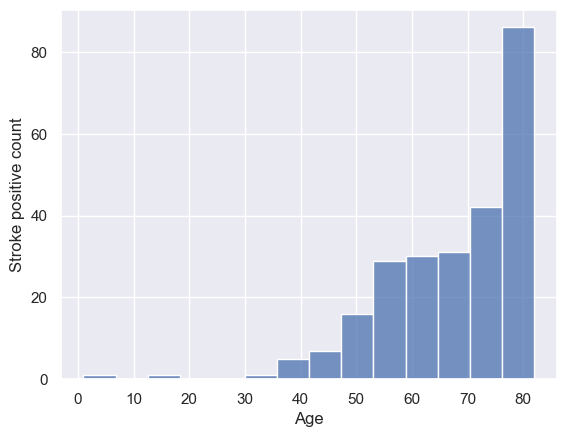

In [23]:
sns.histplot(data=stroke_positive['int_age'])
plt.xlabel('Age')
plt.ylabel('Stroke positive count')
plt.show()

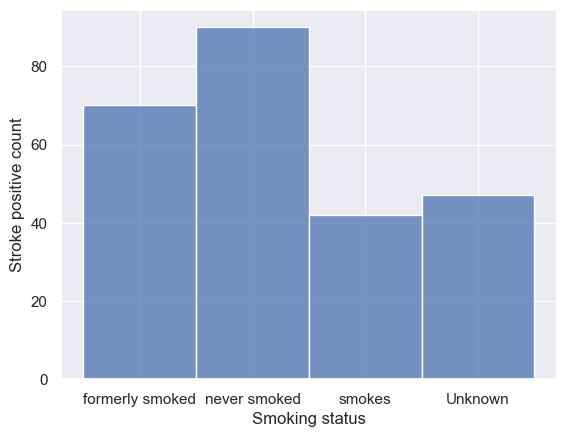

In [24]:
sns.histplot(data=stroke_positive['smoking_status']) 
plt.xlabel('Smoking status')
plt.ylabel('Stroke positive count')
plt.show()

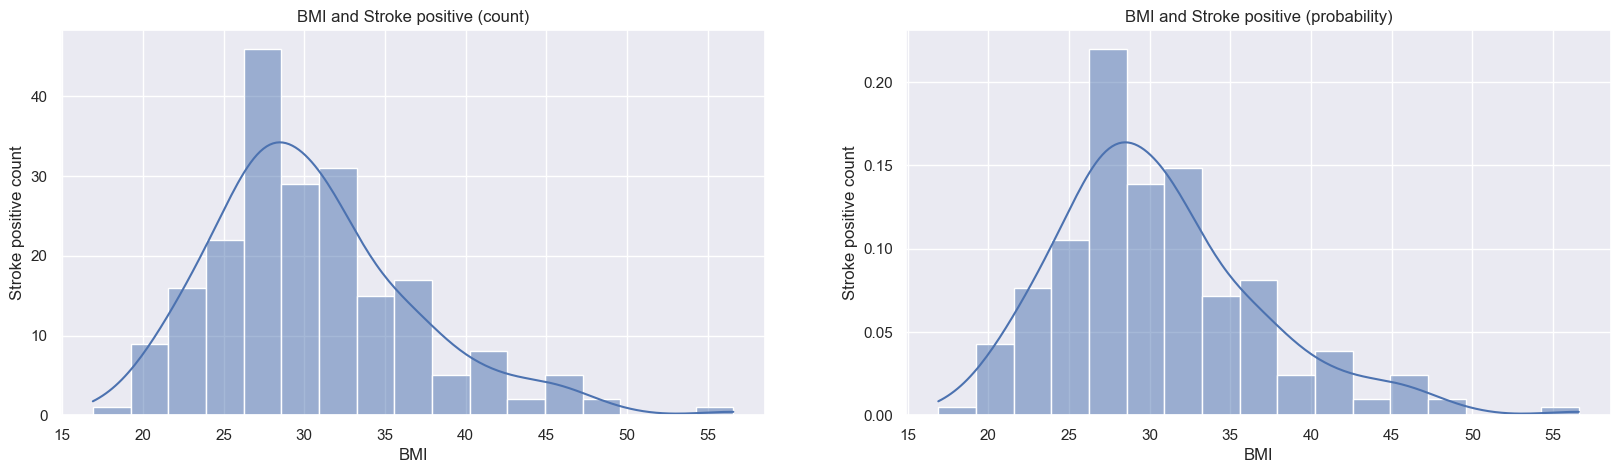

In [46]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.histplot(data=stroke_positive['bmi'],kde=True)
plt.title('BMI and Stroke positive (count)')
plt.xlabel('BMI')
plt.ylabel('Stroke positive count')
plt.subplot(1,2,2)
sns.histplot(data=stroke_positive['bmi'],kde=True,stat='probability')
plt.title('BMI and Stroke positive (probability)')
plt.xlabel('BMI')
plt.ylabel('Stroke positive count')
plt.show()

Text(0, 0.5, 'BMI')

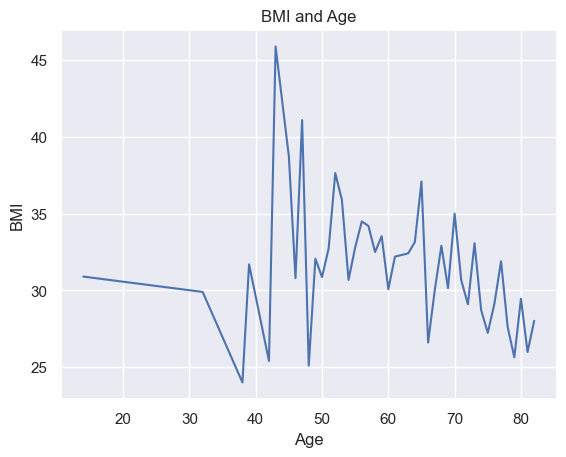

In [31]:
sns.lineplot(data=stroke_positive,x='int_age',y='bmi',ci=None)
plt.title('BMI and Age')
plt.xlabel('Age')
plt.ylabel('BMI')

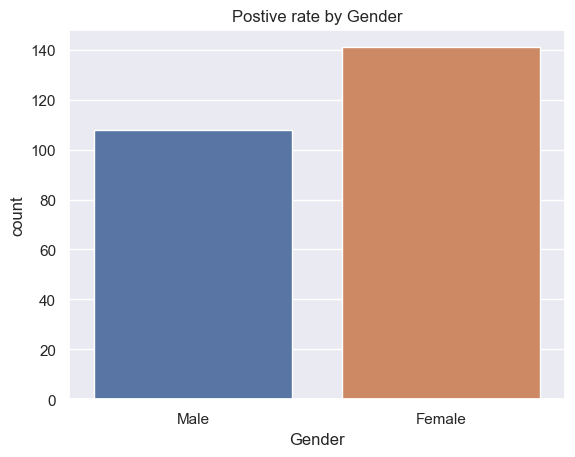

In [40]:
sns.countplot(data=stroke_positive,x='gender')
plt.title('Postive rate by Gender')
plt.xlabel('Gender')
plt.show()

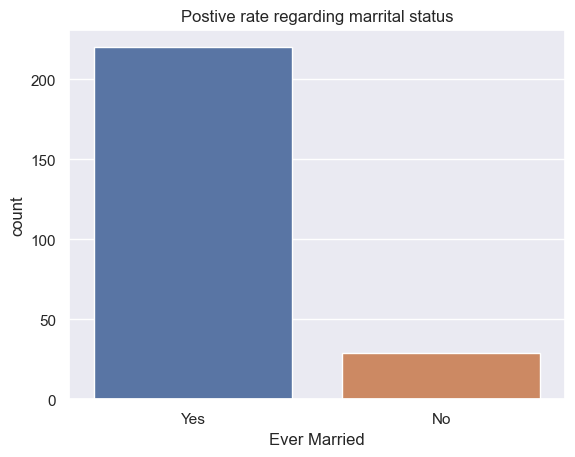

In [41]:
sns.countplot(data=stroke_positive,x='ever_married')
plt.title('Postive rate regarding marrital status')
plt.xlabel('Ever Married')
plt.show()

In [52]:
df.head()

,id,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,int_age
0,9046,Male,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,67
1,51676,Female,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,61
2,31112,Male,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,80
3,60182,Female,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,49
4,1665,Female,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,79


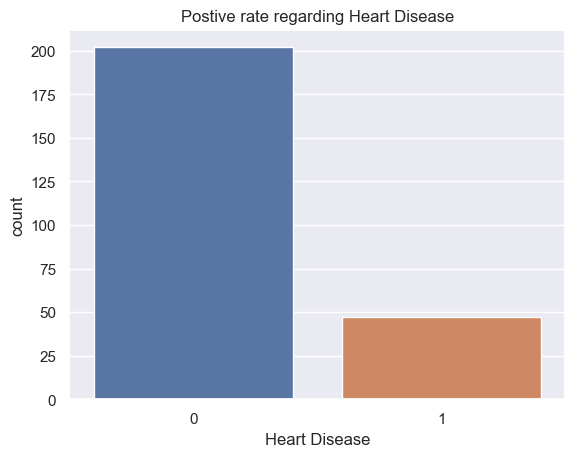

In [51]:
sns.countplot(data=stroke_positive,x='heart_disease')
plt.title('Postive rate regarding Heart Disease')
plt.xlabel('Heart Disease')
plt.show()

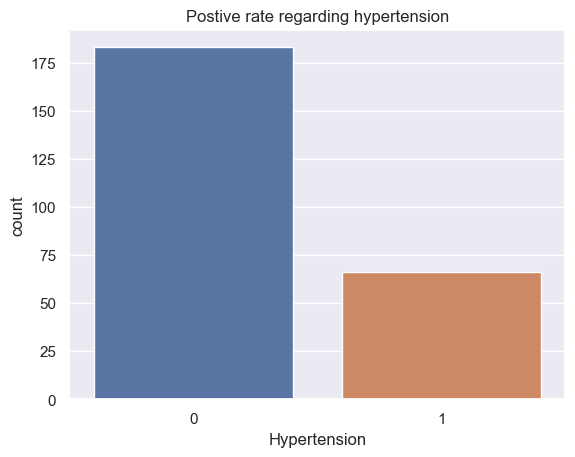

In [53]:
sns.countplot(data=stroke_positive,x='hypertension')
plt.title('Postive rate regarding hypertension')
plt.xlabel('Hypertension')
plt.show()